In [ ]:
"""
Tomado de :
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
"""

In [1]:
# Pandas is used for data manipulation
import pandas as pd# Read in data and display first 5 rows

features = pd.read_csv('temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


year: 2016 para todos los puntos de datos

month: numero del mes del año

day: numero para el dia del año

week: dia de la semana como un character string

temp_2: max temperatura 2 days antes

temp_1: max temperatura 1 day antes

average: promedio historico de max temperatura

actual: max temperatura medida, es el rotulo

friend: yla prediccion de sus amigos, a random number between 20 below the average and 20 above the average

# Identificacion de anomalias, Datos faltantes

En los datos solo hay 348 filas. los datos faltantes pueden impactar el analisis, lo mismo 
que los datos incorrectos y los valores atipicos. En este caso los datos faltantes y la calidad
de los datos es buena porque proviene de la fuente.
Podemos ver que hay 12 columnas, de las que nos itntresan 8, que representan 8 "features" y el rotulo, "actual".

In [2]:
print('The shape of our features is:', features.shape)

The shape of our features is: (348, 12)


Para identificar anomalias, calculamos rapidamente un resumen de estadisticas

In [3]:
# Descriptive statistics for each column
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


No hay puntos de datos que aparezcan como anomalos ni ceros en ninguna de las columnas-
Otra forma para observar la calidad de los datos es dibujar graficas basicas.

In [4]:
col_list = ["year", "month","week","day", "temp_2","temp_1", "average", "actual", "friend" ]
features = pd.read_csv('temps.csv', usecols=col_list)
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [5]:
print('The shape of our features is:', features.shape)

The shape of our features is: (348, 9)


In [6]:
# Descriptive statistics for each column
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


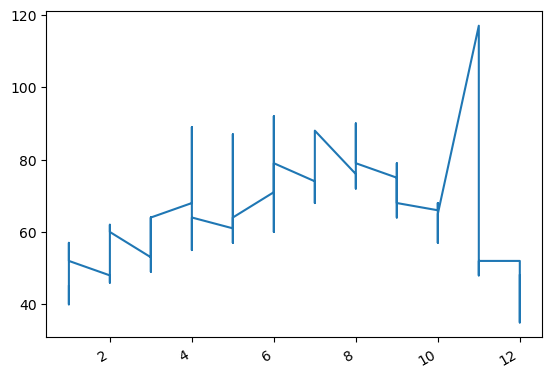

In [7]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df = features 
#df['month'] = df['month'].map(lambda x: datetime.strptime(str(x), '%Y/%m/%d %H:%M:%S.%f'))
x = df['month']
y = df['temp_2']
# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

# Preparacion de Datos

Desafortunadamente no estamos en el punto en que solo alimentamos de datos brutos el modelo y
devuelve una respuesta, generalmente habra que hacer algunos cambios menores para poner los 
datos en terminnos que los entienda la maquina. 
Se confia en pandas para manipular los datos en una estructura conocida como dataframe, que 
basicamente es una hoja excel con filas y columnas.  

# One-Hot Encoding

Es el primer paso para tratar los datos. Este proceso toma variables categoricas, como 
dias de la semana, y las cconvierte en una representacion numerica. 
Cambiamos una unica columna de dias de la semana en siete columnas de datsos binarios.

In [8]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,29,1,0,0,0,0,0,0
1,45.7,44,61,0,0,1,0,0,0,0
2,45.8,41,56,0,0,0,1,0,0,0
3,45.9,40,53,0,1,0,0,0,0,0
4,46.0,44,41,0,0,0,0,0,1,0


In [9]:
print('The shape of our features is:', features.shape)

The shape of our features is: (348, 15)


# Features y targets (rotulos) y conversion de datos en arreglos

Ahora, necesitamos separa los features y los rotulos. Los rotulos son los valores que 
queremos predecir en este caso la temperatura maxima actual y las caracteristicas son 
las columnas que usa el modelo para hacer la prediccion.
Se convierten los dataframes pandas a arreglos numpy que es la forma en que trabaja el
algoritmo. Se guardan los encabezados de las columnas para la visualiazacion posterior

In [10]:
# Use numpy to convert to arrays
import numpy as np# Labels are the values we want to predict
labels = np.array(features['actual'])# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)# Saving feature names for later use
feature_list = list(features.columns)# Convert to numpy array
features = np.array(features)

# Conjuntos de entrenamiento y de prueba

Se dividen los datos en conjunto de entrenamiento y conjunto de prueba. Durante el entrenamiento
dejamos que el modelo "vea" las respuestas, los rotulos, en este caso la temperatura actual. Para
que aprenda a predecir la temperatura actual de los features. 
Esperamos que hay una relacion entre las features y el valor del rotulo, el trabajo del modelo es 
aprender esa relacion durante el entrenamiento.
Luego hay que evaluar el modelo, entonces se hacen predicciones sobre el conjunto de validacion 
dandole solo las features. Como ya tenemos las respuestas, los rotulos, los comparamos con las
predicciones para juzgar la precision del modelo. 

El siguiente codigo divide los datos

In [11]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

Echamos una mirada para estar seguros de que la division se ha hecho correctamente. 

In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 14)
Training Labels Shape: (261,)
Testing Features Shape: (87, 14)
Testing Labels Shape: (87,)


Recapitualndo
1. One-hot encoded categorical variables

2. Split data into features and labels

3. Converted to arrays

4. Split data into training and testing sets

Dependiendo del data set inicial, puede haber trabajo extra como eliminar valores atipicos, 
atribuir valores faltantes, o convertir variables temporales en representaciones ciclicas.

# Establecer una base

Antes de hacer y evaluar predicciones, necesitamos establecer una base, una medida que venza el modelo. Si el modelo no puede mejorar esta base, hay una falla y se debe tratar un modelo
diferente o el problea no es apropiado para trajarlo por ML.
En nuestro caso la prediccion base pueden ser los promedios historicos de temperaturas maximas.
En otras palabras nuestra base es el error que obtendriamos si simplemente predecimos la 
temperatura maxima promedio para todos los dias.

In [13]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


Average baseline error:  5.06


We now have our goal! If we can’t beat an average error of 5 degrees, then we need to 
rethink our approach.

# Entrenando el modelo

Despues de la preparacion de os datos, la creacion y el entrenamiento de modelo es muy simple
usando Scikit learning. Importamos el modelo random forest regression y fit (scikit-learn’s name
for training) el modelo. Esto solo toma 3 lineas:

In [14]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

# Predicciones con el test set

El modelo ya aprendio las relaciones entre los features y los targets.El siguiente paso es averiguar que tan bien lo hace el modelo. Para hacerlo hacemos las predicciones sobre las features del set test.
Luego comparamos las predicciones con las respuestas conocidas en el set target.
Cuando se hace la regresion, necesitamos estar seguros de usar el error absoluto-

Hacer las predicciones con el modelo solo toma 1 linea.

In [15]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.83 degrees.


Estimado de 3.83 grados, mas de 1 grado de mejora promedio sobre la base. 
Puede no parecer mucho pero es una mejora del 25% sobre la base.

# Determine una metrica de comportamiento

Para poner nuestras predicciones en perspectiva, calculamos una precision usando la media de
porcentaje de error promedio, restandolo del 100%.

In [24]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.98 %.


!ESTO SE VE MUY BIEN!! El modelo ha aprendido como predecir la temperatura maxima para el dia
dia siguiente en Seattle con una precision del 94%.

# Mejore el modelo, si es necesario

En el flujo ded trabajo normal, es cuando se comienzan a ajustar los hiperpraametros. Lo mas comun
es hacer un atado de modelos con diferentes definiciones o hipérpeametros, evaluarlos con el mismo
conjunto de entrenamiento y ver cual lo hace mejor. 
El ajuste de los hiperparametros es mas de ingeiieria que de teoria. Una prediccion del 94% es 
bastante buens, pero se debe tener en cuenta que esto sucede muy pocas veces.

# Interprete el modelo y reporte los resultados

Una de las mejores partes de la implementacion de Random Forest en Skicit-learn, es que realmente
podemos examinar cualquier arbol del bosque. Seleccionamos un arbol y guardamos toda su imagen.

In [16]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Import tools needed for visualization
from sklearn.tree import export_graphviz

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = 
                feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

ModuleNotFoundError: No module named 'pydot'

<img src="tree.png">

El arbol esta bastante expandido con 15 capas. Se va a limitar la profundidad de los arboles
para producir una imagen comprensible.

In [27]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', 
feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

Aqui esta el arbol reducido con anotaciones en los nodos

<img src="captura.jpg">


<img src="captur.jpg">

Solo con base en este arbol se puede hacer una prediccion para cualquier nuevo punto de datos. 
Tomemos un ejemplo, hacer una prediccion para el miercoles 27 de diciembre de 2017. Las variables
son: temp_2 = 39, temp_1 = 35, average = 44, y friend = 30. Comenzamos en el nodo raiz y la primera
respuesta es true porque temp_1 ≤ 59.5. Nos movemos por la izquierda y encontramos la segunda 
pregunta que tambien es true, average ≤ 46.8. Yendo hacia abajo por la izquierda que tambien
es true debido a que temp_1 ≤ 44.5. Por lo tanto concluimos que nuestro estimado de maxima
temperatura es 41.0 grados como lo indica el valor en el nodo hoja.
Una observacion interesante es que en el nodo raiz solo tiene solo 162 muestras (samples) aunque los
datos de entrenamiento 261 puntos de datos. Esto se debe a que cada arbol en el bosque se entrena
con un conjunto aleatorio de puntos de datos con reemplazo (lo que se llama bagging de bootstrap
aggregating). Se puede poner off el muestreo con reemplazo, haciendo bootstrap = False cuando se
hace el bosque. El muestreo aleatorio junto con el muestreo aleatorio de un subconjunto de features
en cada nodo del arbol es por que el modelo se llama bosque "aleatorio".

Ademas, observe que en nuestro arbol, hay solo 2 variables que realmente se usan para haver la
una prediccion! De acuerdo a este arbol de decision particular decision, el resto de las features
no son importantes para hacer una prediccion. El mes del año, el dia del mes, y la prediccion de
muestor amigo son completamente inutiles para predecir la temperatura maxima para mañana! La 
unica informacion importante deacuerdo con nuestro arbol simple es la temperatura 1 day antes y
el proedio historica.
La visualizacion del arbol aumena el conocimiento de nuestro domain del problema, y ahora sabemos
que datos buscamos si queremos hacer una prediccion!

# Importancia de las variables

Con el fin de cuantificar la utilidad de todas las variables en el bosque aleatorio completo,
podemos observar la importancia relativa de las variables. Las importancias que returna el 
Skicit-learn representan que tanto mejora la prediccion el incluir una variable particular. 
Los calculos reales de la importancia no se incluyen, pero podemos usar los numeros para 
hacer comparaciones relativas entre las variables

El codigo aprovecha varios trucos number del Python, como list, zip, sorting, y desempaque
de argumentos. 

In [28]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) 
for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) 
for pair in feature_importances];

Variable: temp_1               Importance: 0.69
Variable: average              Importance: 0.2
Variable: day                  Importance: 0.03
Variable: friend               Importance: 0.03
Variable: temp_2               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


En el tope de la lista esta temp_1, la temperatura maxina del dia anterior. Nos dice que este es el 
mejor predictor de la temperature maxima para un dia, un hallazgo un poco intuitivo. El segundo
factor mas importante es el promedio historico de temperature maxima, Tampoco es 
sorprendente. Lo que piensa su amigo tampoco es muy util, junto con el dia de la semana, tampoco
es muy util. 

En futuras implementaciones del modelo, podemos eliminar las variables que no tienen importancia y
no influyen en el comportamiento. Ademas, si usamos un modelo diferente, digamos SVM, podriamos usar
las features importantes del bosque aleatorio como una clase de metodo para la seleccion de features.
Hagamos rapidamente un bosque aleatorio solo con las variables importantes, la temperatura maxima
de 1 dia antes y el promedio historico y veamos como se comporta para comparar.

In [29]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


Est realmente os dice que que realmente no necesitamos todos los datos que recogimos para hacer una predicciones correctas!. Si contiuaramos usando este modelo, solo tendriamos las dos variables y logramos tener casi el mismo comportamiento. 
 En un ambiente de produccion, necesitariamos ponderar disminuir la precision 
versus el tiempo extra requerido para obtener mas informacion. Saber como encontrar el balamce correcto entre comportamiento y costo es una destreza esencial para un ingeniro de ML y finalmente dependera del problema!

En este punto se ha cubierto casi todo lo que se debe saber para la implementacion de un bosque aleatorio para un problema de regresion. Podemos tener confianza de que nuestro modelo puede predecir la temperatura maxima de mañana con un 94% de precision a partir de un año de daos historicos. Con esto puede jugar con este ejemplo, o usar el modelo con otro conjunto de datos. 
here, feel free to play around with this example, or use the model on a data set of your choice. 
Ahora se van a hacer algunas visualizationes. 


# Visualizaciones

El primer diagrama es una barra simple de las importancias de las caracateristicas, para ilustrar las disparidades en la significancia relativa de las variables. Hacer graficos con Python  no es intuitivo y casi todo sobre este tema se puede encontrar en Stack Overflow. No se preocupe si el codigo no tiene mucho sentido, a veces no es necesario comprender completamente el codigo! 

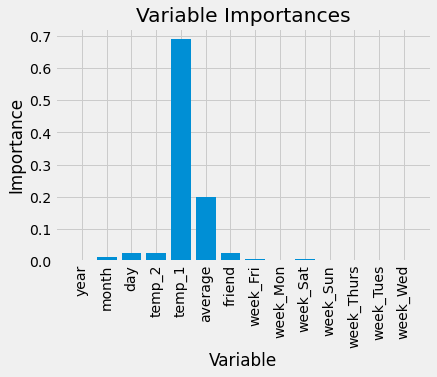

In [31]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical'
       
)# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Luego, se grafican el conjunto de datos completo resaltando las predicciones. Esto requiere un poco de manipulacion de datos, pero no es tan dificil.  Podemos usar este grafico para determinar si hay valores atipicos ya sea en los datos o en las predicciobes  

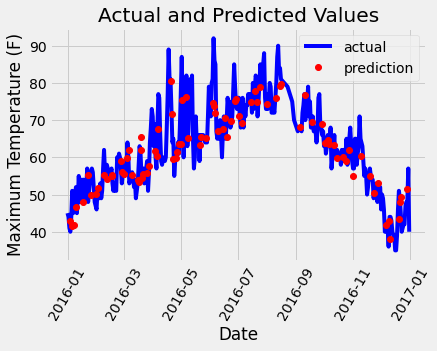

In [32]:
# Use datetime for creating date objects for plotting
import datetime

# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) 
for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) 
for year, month, day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') 
for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

Poco trabajo para un buen grafico! No parece que haya valores atipicos notables que yaya necesidad de corregir.  Para un diagnostico posterior del modelo, se pueden graficar los residuos (los errores) para ver si el modelo tiene una tendencia a estar sobre entrenado o subentrenado, tambien se puede observar si los errores estan distribuidos normalmente.   
Sin embargo, solo se hace un diagrama final que muestra los valores reales, la temperatura en un dia, el promedio historico y la prediccion del amigo. Esto permitira ver la diferencia entre variables utiles y esos no son tan utiles.

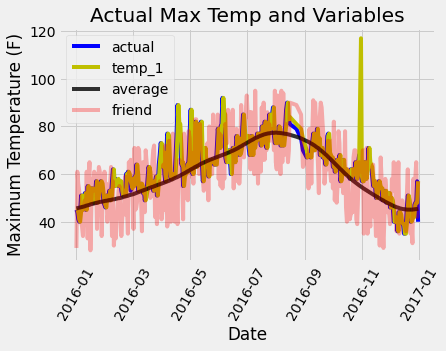

In [33]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]

# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');

# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); 
plt.title('Actual Max Temp and Variables');

Es algo dificil distinguir todas las lineas, pero podemos ver porque la temperatura maxima en un dia anterior y la maxima temperatura historica son utiles para predecir la maxima temperatura, mientras el amigo no.  Graficos como este son utiles para adelantarnos en el tiempo de manera que podenos escoger las variables que se deben incluir, pero tambien se pueden usar para el diagnostico. 
Graphs such as this are often helpful to make ahead of time so we can choose the variables to 
include, but they also can be used for diagnosis. 

# Conclusiones

Con estos grafos, terminamos un ejemplo completo de ML! En este punto, si queremos mejorar el modelo, debemos tratar diferentes hiperparametros, tratar un algoritmo diferente, o un mejor enfoque global, recoger mas datos!
El comportamiento de cualquier modelo es directamente proporcional a la cantidad de datos validos de los cuales puede aprender, pues estamos usando ua cantidad muy limitada de informacion para el entrenamiento.